<a href="https://colab.research.google.com/github/UlyShel/basics_of_machine_learning/blob/main/HW8_%D0%A8%D0%B5%D0%BB%D0%B5%D0%B3%D0%BE%D0%B2%D0%B0_%D0%A3%D0%BB%D1%8C%D1%8F%D0%BD%D0%B0_%D0%9E%D0%9C%D0%9E_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 1 Бустинг (5 баллов)

В этой части будем предсказывать зарплату data scientist-ов в зависимости  от ряда факторов с помощью градиентного бустинга.

В датасете есть следующие признаки:



* work_year: The number of years of work experience in the field of data science.

* experience_level: The level of experience, such as Junior, Senior, or Lead.

* employment_type: The type of employment, such as Full-time or Contract.

* job_title: The specific job title or role, such as Data Analyst or Data Scientist.

* salary: The salary amount for the given job.

* salary_currency: The currency in which the salary is denoted.

* salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

* employee_residence: The country or region where the employee resides.

* remote_ratio: The percentage of remote work offered in the job.

* company_location: The location of the company or organization.

* company_size: The company's size is categorized as Small, Medium, or Large.

In [ ]:
!wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw08_boosting_clustering/ds_salaries.csv

--2024-06-10 13:43:53--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw08_boosting_clustering/ds_salaries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210076 (205K) [text/plain]
Saving to: ‘ds_salaries.csv’

ds_salaries.csv     100%[===================>] 205.15K  --.-KB/s    in 0.006s  

2024-06-10 13:43:54 (35.2 MB/s) - ‘ds_salaries.csv’ saved [210076/210076]



In [ ]:
import pandas as pd

df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Задание 1 (0.5 балла) Подготовка



*   Разделите выборку на train, val, test (80%, 10%, 10%)
*   Выдерите salary_in_usd в качестве таргета
*   Найдите и удалите признак, из-за которого возможен лик в данных


In [ ]:
from sklearn.model_selection import train_test_split

y = df['salary_in_usd']
X = df.drop('salary_in_usd', axis=1)
X = X.drop('salary', axis=1)

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=66)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=66)

## Задание 2 (0.5 балла) Линейная модель


*   Закодируйте категориальные  признаки с помощью OneHotEncoder
*   Обучите модель линейной регрессии
*   Оцените  качество через MAPE и RMSE


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X_train_test = pd.concat([X_train, X_test, X_val])
y_train_test = pd.concat([y_train, y_test, y_val])

In [ ]:
categorical = (X_train_test.dtypes == "object").values
cat_X = X_train_test[X_train_test.columns[categorical]]
num_X = X_train_test[X_train_test.columns[~categorical]]

In [ ]:
ohe = OneHotEncoder(categories='auto', sparse=False)
cat_feat = ohe.fit_transform(cat_X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
num_X = num_X.reset_index(drop=True)
cat_feat= pd.DataFrame(cat_feat).reset_index(drop=True)
X_res = pd.concat([num_X, cat_feat], axis=1)

In [ ]:
y_train_test = y_train_test.reset_index(drop=True)
X_train1, X_test_val, y_train1, y_test_val = train_test_split(X_res, y_train_test, test_size=0.2, random_state=66)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=66)

In [ ]:
lg = LinearRegression()
X_train1.columns = X_train1.columns.astype(str)
lg.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
X_test1.columns = X_test1.columns.astype(str)
y_test_predicted = lg.predict(X_test1)

In [ ]:
from math import sqrt

In [ ]:
print('MAPE: ', mean_absolute_percentage_error(y_test1, y_test_predicted))
print('RMSE: ', sqrt(mean_squared_error(y_test1, y_test_predicted))) # ошибка очень существенная

MAPE:  42278308.083092175
RMSE:  13057079544834.188


## Задание 3 (0.5 балла) XGboost

Начнем с библиотеки xgboost.

Обучите модель `XGBRegressor` на тех же данных, что линейную модель, подобрав оптимальные гиперпараметры (`max_depth, learning_rate, n_estimators, gamma`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
# params = {
#     'max_depth': range(2, 7),
#     'learning_rate': [0.1],
#     'n_estimators': [50, 100, 150, 200, 250],
#     'gamma': [0.1, 0.2, 0.3],
#     'colsample_bytree' : np.arange(0.1, 1, 0.1),
#     'subsample': np.arange(0.1, 1, 0.1),
#     'reg_alpha': [1, 10, 50, 100, 120, 150, 200]
# }

# xgb = XGBRegressor()
# grid = GridSearchCV(xgb, params, scoring='neg_mean_absolute_percentage_error', cv=5)
# grid.fit(X_val, y_val)

# print(grid.best_params_)

# я могла бы сделать вот так, но это грузилось бы ОЧЕНЬ долго, поэтому я решила разделить на этапы, представленные в семинарской тетрадке

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import roc_auc_score

In [ ]:
n_df = pd.DataFrame(columns=['n', ' val rmse', 'val mape'])
trees = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]

for tree in trees:
  model_xgb = XGBRegressor(
      learning_rate=0.1,
      n_estimators=tree,
      objective="reg:linear",
      seed=66)
  model_xgb.fit(X_train1, y_train1)
  n_df.loc[len(n_df.index)] = [tree,  sqrt(mean_squared_error(y_val1, model_xgb.predict(X_val1))), mean_absolute_percentage_error(y_val1, model_xgb.predict(X_val1))]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:38:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:38:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:38:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:38:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

In [ ]:
n_df

,n,val rmse,val mape
0,50.0,47763.034923,0.414255
1,100.0,47445.623468,0.396143
2,150.0,47497.546304,0.389385
3,200.0,47558.313480,0.389529
4,250.0,47582.999733,0.387542
5,300.0,47618.310812,0.386934
6,350.0,47663.305930,0.386966
7,400.0,47640.995711,0.385360
8,450.0,47612.476158,0.384198
9,500.0,47695.239641,0.386203


Как видно, после 450 деревьев ошибка стала расти, поэтому пока что оставим такое значение переменной. К слову, показательно то, что, несмотря на то, что мы подобрали лишь 1 параметр (learning rate не в счет), ошибка уже заметно упала

In [ ]:
model_xgb = XGBRegressor(
      learning_rate=0.1,
      n_estimators=450,
      objective="reg:linear",
      seed=66,
      )

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {"max_depth": range(2, 7), "min_child_weight": range(1, 8)}

gsearch1 = GridSearchCV(
    estimator=model_xgb, param_grid=param_test1, scoring="neg_root_mean_squared_error", n_jobs=-1
)

gsearch1.fit(X_val1, y_val1)

gsearch1.best_params_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:41:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


{'max_depth': 3, 'min_child_weight': 1}

In [ ]:
model_xgb.max_depth = 3
model_xgb.min_child_weight = 1

In [ ]:
import numpy as np

In [ ]:
param_test_gamma = {'gamma': np.arange(0.1, 1, 0.05)}

gsearch_gamma = GridSearchCV(
    estimator=model_xgb, param_grid=param_test_gamma, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=5
)

gsearch_gamma.fit(X_val1, y_val1)

gsearch_gamma.best_params_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:42:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


{'gamma': 0.1}

In [ ]:
model_xgb.gamma = 0.1

In [ ]:
param_test_3 = {'subsample': np.arange(0.1, 1, 0.1), 'colsample_bytree': np.arange(0.1, 1, 0.1)}

gsearch_3 = GridSearchCV(
    estimator=model_xgb, param_grid=param_test_3, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=5
)

gsearch_3.fit(X_val1, y_val1)

gsearch_3.best_params_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:46:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.2, 'subsample': 0.9}

In [ ]:
model_xgb.colsample_bytree = 0.2
model_xgb.subsample = 0.9

In [ ]:
param_test_reg = {'reg_alpha': [1, 10, 20, 50, 100, 120, 150, 200]}

gsearch_reg = GridSearchCV(
    estimator=model_xgb, param_grid=param_test_reg, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=5
)

gsearch_reg.fit(X_val1, y_val1)

gsearch_reg.best_params_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:46:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


{'reg_alpha': 50}

In [ ]:
model_xgb.reg_alpha = 50

In [ ]:
%timeit gsearch1.fit(X_val1, y_val1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

1min 42s ± 2.51 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit gsearch_gamma.fit(X_val1, y_val1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:03:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:04:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

51.6 s ± 1.11 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit gsearch_3.fit(X_val1, y_val1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:11:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:15:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:19:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:23:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

3min 58s ± 1.76 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit gsearch_reg.fit(X_val1, y_val1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:39:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:40:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:40:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:40:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

24 s ± 2.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
model_xgb.fit(X_train1, y_train1)

print('MAPE: ', mean_absolute_percentage_error(y_test1, model_xgb.predict(X_test1)))
print('RMSE: ', sqrt(mean_squared_error(y_test1, model_xgb.predict(X_test1))) )

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAPE:  0.3112669264695686
RMSE:  46870.07700708876


In [ ]:
%timeit model_xgb.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:42:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

1.01 s ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit model_xgb.predict(X_test1)

60.1 ms ± 17.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Качество значительно улучшилось (RMSE и MAPE уменьшились в разы! бустинг реально хорош!), тем не менее процесс обучения очень долгий! Подбирать параметров одним словарем, как это рекомендовано изначально, просто невыносимо, поэтому я разделила на разные чанки так, как было предложено в семинарской тетрадке. Сам процесс предсказания не особо долгий (едва ли дольше линейных моделей), но до него еще нужно дожить..

## Задание 4 (1 балл) CatBoost

Теперь библиотека CatBoost.

Обучите модель `CatBoostRegressor`, подобрав оптимальные гиперпараметры (`depth, learning_rate, iterations`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
!pip install --upgrade catboost
!pip install --upgrade ipywidgets
!pip install shap
!pip install sklearn
!pip install --upgrade numpy
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
params_catboost = {
    'depth' : range(2, 7),
    'learning_rate' : [0.01, 0.1],
    'iterations' : [500, 1000, 1500, 2000]
}

cat_model = CatBoostRegressor(random_seed=63, verbose=False)

catboost_grid = GridSearchCV(cat_model, params_catboost, scoring='neg_mean_absolute_percentage_error', cv=5)
catboost_grid.fit(X_val1, y_val1)

catboost_grid.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [ ]:
%timeit catboost_grid.fit(X_val1, y_val1)

2min 18s ± 2.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
catboost1 = catboost_grid.best_params_

In [ ]:
cat_model.depth = 3
cat_model.learning_rate = 0.1
cat_model.iterations = 500

In [ ]:
cat_model.fit(X_train1, y_train1)

print('MAPE: ', mean_absolute_percentage_error(y_test1, cat_model.predict(X_test1)))
print('RMSE: ', sqrt(mean_squared_error(y_test1, cat_model.predict(X_test1))) )

MAPE:  0.31323447515688035
RMSE:  47242.73926684194


In [ ]:
%timeit cat_model.fit(X_train1, y_train1)

1.94 s ± 491 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit cat_model.predict(X_test1)

10.7 ms ± 2.78 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Ошибка осталась примерно той же. Я не пользовалась прелестями catboost'а, просто закодировала категориальные признаки самостоятельно и так же, как в xgboost'е почти вручную подбирала гиперпараметры, но разница в скорости колоссальная! Все это заняло лишь пару минут, когда подбор xgboost полным словарем не прошел и за 15, и пришлось подбирать каждый гиперпараметр отдельно, что неудобно.  

Для применения catboost моделей не обязательно сначала кодировать категориальные признаки, модель может кодировать их сама. Обучите catboost с подбором оптимальных гиперпараметров снова, используя pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметра cat_features. Оцените качество и время. Стало ли лучше?

In [ ]:
from catboost import Pool

cat_catboost = [0, 1, 2, 3, 4, 5, 7, 8]
pool = Pool(X, label=y, cat_features = cat_catboost)

X_train_cat, X_test_val_cat, y_train_cat, y_val_test_cat = train_test_split(X, y, test_size=0.2, random_state=66)
X_val_cat, X_test_cat, y_val_cat, y_test_cat = train_test_split(X_test_val_cat, y_val_test_cat, test_size=0.5, random_state=66)

In [ ]:
from sklearn.model_selection import GridSearchCV

cat_params = {"learning_rate": [0.03, 0.1], "depth": [2, 3, 4, 5], "l2_leaf_reg": [1, 3, 5, 7, 9]}

catboost_model = CatBoostRegressor(random_seed=63, n_estimators=50, verbose=False)

catboost2_grid = GridSearchCV(catboost_model, cat_params, scoring='neg_mean_absolute_percentage_error', cv=5)
catboost2_grid.fit(X_val_cat, y_val_cat, cat_features=cat_catboost)

best_params = catboost2_grid.best_params_

In [ ]:
%timeit catboost2_grid.fit(X_val_cat, y_val_cat, cat_features=cat_catboost)

15 s ± 879 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
Catboost_last = CatBoostRegressor(**best_params)

In [ ]:
Catboost_last.fit(
    X_train_cat,
    y_train_cat,
    cat_features=cat_catboost,
    eval_set=(X_val_cat, y_val_cat),
    verbose=False,
)

In [ ]:
%timeit Catboost_last.fit(X_train_cat, y_train_cat, cat_features=cat_catboost, eval_set=(X_val_cat, y_val_cat), verbose=False)

6.47 s ± 1.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit Catboost_last.predict(X_test_cat)

2.52 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
print('MAPE: ', mean_absolute_percentage_error(y_test_cat, Catboost_last.predict(X_test_cat)))
print('RMSE: ', sqrt(mean_squared_error(y_test_cat, Catboost_last.predict(X_test_cat))) )

MAPE:  0.37758923047547416
RMSE:  47149.820243609785


**Ответ:** во-первых, обучение (и предсказание) гораздо быстрее, чем в первой модели catboost'а, что безусловно плюс! По поводу ошибки: она очень небольшая, конечно, но при кодировании OHE ошибка поменьше. Тем не менее, кодирование с помощью Catboost'а безусоловно удобнее в случае если категориальных признаков или их категорий очень много, что может создать огромный датасет с кучей признаков, на котором легко переобучиться.

На семинаре обсуждалось, что у этого способа есть и другие особенности - меньшее переобучение. Можно попробовать это проверить mape и rmse трейна в 1-ом catboost'е (самостоятельное кодирование) и во 2-ом.

In [ ]:
print('MAPE 1 train: ', mean_absolute_percentage_error(y_train1, cat_model.predict(X_train1)))
print('RMSE 1 train: ', sqrt(mean_squared_error(y_train1, cat_model.predict(X_train1))))

print('\nMAPE 2 train: ', mean_absolute_percentage_error(y_train_cat, Catboost_last.predict(X_train_cat)))
print('RMSE 2 train: ', sqrt(mean_squared_error(y_train_cat, Catboost_last.predict(X_train_cat)))) # ну в целом да, во втором случае меньшее переобучение

MAPE 1 train:  0.2856642139407104
RMSE 1 train:  42265.854910324706

MAPE 2 train:  0.323536348006642
RMSE 2 train:  44523.230331070175


## Задание 5 (0.5 балла) LightGBM

И наконец библиотека LightGBM - используйте `LGBMRegressor`, снова подберите гиперпараметры, оцените качество и скорость.


In [ ]:
!conda install lightgbm --y

/bin/bash: line 1: conda: command not found


In [ ]:
from lightgbm import LGBMRegressor

params_lgbm = {
    'learning_rate' : [0.01, 0.03, 0.1],
    'n_estimators' : [10, 20, 50, 100],
    'num_leaves' : [10, 20, 30]
}

lgbm_boost = LGBMRegressor()

lgbm_grid = GridSearchCV(lgbm_boost, params_lgbm, cv=5)
lgbm_grid.fit(X_val1, y_val1)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.03, 0.1],
                         'n_estimators': [10, 20, 50, 100],
                         'num_leaves': [10, 20, 30]})

In [ ]:
%timeit lgbm_grid.fit(X_val1, y_val1)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [ ]:
best_lgbm = lgbm_grid.best_params_

lgbm = LGBMRegressor(**best_lgbm)
lgbm.fit(X_train1,
    y_train1,
    eval_set=[(X_val1, y_val1)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 3004, number of used features: 42
[LightGBM] [Info] Start training from score 137191.395473


LGBMRegressor(num_leaves=10)

In [ ]:
%timeit lgbm.fit(X_train1, y_train1, eval_set=[(X_val1, y_val1)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 3004, number of used features: 42
[LightGBM] [Info] Start training from score 137191.395473
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 3004, number of used features: 42
[LightGBM] [Info] Start training from score 137191.395473
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

In [ ]:
print('MAPE: ', mean_absolute_percentage_error(y_test1, lgbm.predict(X_test1)))
print('RMSE: ', sqrt(mean_squared_error(y_test1, lgbm.predict(X_test1))))

MAPE:  0.35199930321341644
RMSE:  47471.868057714775


In [ ]:
%timeit lgbm.predict(X_test1)

4.59 ms ± 342 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Скорость выполнения, как и общеали, очень крутая, обучение происходит буквально мгновенно! Качество, к слову, тоже отлчиное, все еще не такое крутое, как catboost через OHE, но уж точно точно линейной модели..

## Задание 6 (2 балла) Сравнение и выводы

Сравните модели бустинга и сделайте про них выводы, какая из моделей показала лучший/худший результат по качеству, скорости обучения и скорости предсказания? Как отличаются гиперпараметры для разных моделей?

**XGboost**

- `скорость подбора гиперпараметров + обучения:` 1min 42s ± 2.51 s per loop + 51.6 s ± 1.11 s per loop + 3min 58s ± 1.76 s per loop + 24 s ± 2.04 s per loop + 1.01 s ± 34.4 ms per loop -> *6 минут 56.61 секунд*

- `скорость предсказания:` 60.1 ms ± 17.7 ms per loop -> *60.1 миллисекунд*

- `качество:`

MAPE:  0.3112669264695686 ~ *0.311*

RMSE:  46870.07700708876 ~ *46870.08*

**CatBoost 1 (OHE)**

- `cкорость подбора гиперпараметров + обучения:` 2min 18s ± 2.38 s per loop + 1.94 s ± 491 ms per loop -> *2 минуты 19.94 секунд*

- `скорость предсказания:` 10.7 ms ± 2.78 ms per loop -> *10.7 миллисекунд*

- `качество:`

MAPE:  0.31323447515688035 ~ *0.313*

RMSE:  47242.73926684194 ~ *47242.74*

**CatBoost 2**

- `скорость подбора гиперпараметров + обучения:` 15 s ± 879 ms per loop + 6.47 s ± 1.03 s per loop  -> *21.47 секунда*

- `скорость предсказания:`2.52 ms ± 129 µs per loop -> *2.52 миллисекунды*

- `качество: `

MAPE:  0.37758923047547416 ~ *0.378*

RMSE:  47149.820243609785 ~ *47149.82*

**LightGBM**

- `скорость подбора гиперпараметров + обучения:` 7.79 s ± 359 ms per loop  + 82.2 ms ± 18 ms per loop -> *7.872 секунд*

- `скорость предсказания:` 4.59 ms ± 342 µs per loop  -> *4.59 миллисекунды*

- `качество: `

MAPE:  0.35199930321341644 ~ *0.352*

RMSE:  47471.868057714775 ~ *47471.87*

`Лучший результат по скорости обучения и подбора гиперпараметров:` LightGBM (это было ожидаемо, он изначально был зарекомендован как самый быстрый)

`Лучший результат по скорости предсказания:` CatBoost 2 (2.7 миллисекунды)

`Лучший результат по качеству:` XGBoost все-таки!

`Худший результат по скорости обучения и подбора гиперпараметров:` XGBoost. Но тут безусловно важно понимать, что полученная цифра (около 7 минут) это сумма предсказанйи одельных параметров, а не всех одновременно. В случае, если бы мы эту модель обучали так же, как и остальные, вышло бы больше 15 минут..

`Худший результат по скорости предсказания:` XGBoost

`Худший результат по качеству:` CatBoost 2 (но тут, конечно, важно понимать, что разница в каких-то сотых долях (с точки зрения MAPE), но при этом он меньше переобучается, чем остальные)

In [ ]:
xgb = model_xgb.get_params()
xgb = {k: v for k, v in xgb.items() if (v != None) & (v != False)}

print(f'XGB: \n{pd.DataFrame(xgb.items()).sort_values(by=0)}')
print(f'\nCatboost 1: \n{pd.DataFrame(catboost1.items()).sort_values(by=0)}')
print(f'\nCatboost 2: \n{pd.DataFrame(best_params.items()).sort_values(by=0)}')
print(f'\nLGBM: \n{pd.DataFrame(best_lgbm.items()).sort_values(by=0)}')

XGB: 
                   0           1
1   colsample_bytree         0.2
2              gamma         0.1
3      learning_rate         0.1
4          max_depth           3
5   min_child_weight           1
6            missing         NaN
7       n_estimators         450
0          objective  reg:linear
8          reg_alpha          50
10              seed          66
9          subsample         0.9

Catboost 1: 
               0      1
0          depth    3.0
1     iterations  500.0
2  learning_rate    0.1

Catboost 2: 
               0    1
0          depth  5.0
1    l2_leaf_reg  1.0
2  learning_rate  0.1

LGBM: 
               0      1
0  learning_rate    0.1
1   n_estimators  100.0
2     num_leaves   10.0


Один из параметров, который встречается почти во всех моделях кроме LGBM (потому что он обучается по листьям, а не по уровням), глубина дерева, для всех градиентных бустингов находится в диапазоне 3-5.


N-estimators (количество базовых моделей) для XGB и CatBoost'а довольно большое (XGB = 450, CatBoost 1 = 500). В случае с XGB это, конечно, ведет к переобучению, но вот Catboost'у связано с одним из основных его плюсов. Catboost сам по себе он очень устройчив к переобучению. Тем не менее, количество итераций, конечно, повлияло на скорость обучения (2 минуты, что гораздо больше, чем у Catboost2 и LGBM). Для LGBM построено в разы меньше моделей (100), что связано с его особенностью - скоростью. Данный гперпараметр для Catboost'а даже меньше (50), что связано с его изначальным упором на быстрый процесс обучения и с "исходным методом повышения градиента для более быстрой реализации" (https://pro.arcgis.com/ru/pro-app/latest/tool-reference/geoai/how-catboost-works.htm#:~:text=%D0%9A%D0%B0%D0%BA%2520%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D1%82%2520%D0%B8%D0%B7%2520%D0%BD%D0%B0%D0%B7%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%252C%2520CatBoost,%D0%B8%D1%82%D0%B5%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%2520%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D1%81%D1%8F%2520%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE%2520%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D0%B5%D0%B2%2520%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.). Малое количество базовых моделей в целом позволяет моделям быстро обучаться и не переобучаться.

**Ответ:** лучшую модель выделить сложно, все отличились по разным категориям, и тут важно думать, что нам конкретно важно. Большинство категориальных признаков в датасете - catboost идеально подойдет, много признаков в целом, или/и нам важна скорость - LGBM. Кажется, что XGBoost показала себя хуже всего, но лично я получила удовольствие от работы с ней во многом засчет по итогу выбитого качества (более того, сразу была видна разительная разница с линейной моделью)

# Часть 2 Кластеризация (5 баллов)

Будем работать с данными о том, каких исполнителей слушают пользователи музыкального сервиса.

Каждая строка таблицы - информация об одном пользователе. Каждый столбец - это исполнитель (The Beatles, Radiohead, etc.)

Для каждой пары (пользователь, исполнитель) в таблице стоит число - доля прослушивания этого исполнителя этим пользователем.


In [ ]:
import pandas as pd
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Будем строить кластеризацию исполнителей: если двух исполнителей слушало много людей примерно одинаковую долю своего времени (то есть векторы близки в пространстве), то, возможно исполнители похожи. Эта информация может быть полезна при построении рекомендательных систем.

## Задание 1 (0.5 балла) Подготовка

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [ ]:
ratings_transposed = ratings.T

# https://ru.stackoverflow.com/questions/757329/%D0%9A%D0%B0%D0%BA-%D0%B2-pandas-%D1%81%D0%BC%D0%B5%D0%BD%D0%B8%D1%82%D1%8C-%D1%81%D1%82%D0%BE%D0%BB%D0%B1%D1%86%D1%8B-%D1%81%D0%BE-%D1%81%D1%82%D1%80%D0%BE%D0%BA%D0%B0%D0%BC%D0%B8-%D0%BC%D0%B5%D1%81%D1%82%D0%B0%D0%BC%D0%B8

Выкиньте строку под названием `user`.

In [ ]:
ratings_transposed.drop(ratings_transposed.index[0], inplace=True)
ratings_transposed

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
群星,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agalloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В таблице много пропусков, так как пользователи слушают не всех-всех исполнителей, чья музыка представлена в сервисе, а некоторое подмножество (обычно около 30 исполнителей)


Доля исполнителя в музыке, прослушанной  пользователем, равна 0, если пользователь никогда не слушал музыку данного музыканта, поэтому заполните пропуски нулями.



In [ ]:
ratings_transposed = ratings_transposed.fillna(0)
ratings_transposed.sample()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
thursday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028332,0.0


## Задание 2 (0.5 балла) Первая кластеризация

Примените KMeans с 5ю кластерами, сохраните полученные лейблы

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 5, random_state=66)
k_means = k_means.fit(ratings_transposed)
k_means_y = k_means.predict(ratings_transposed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
k_means_y #лейблы классов

# Можно еще вывевсти таким образом, но это по сути одно и то же в нашем случае, когда мы не делим на трейн и тест выборку:
# k_means.labels_

array([3, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Выведите размеры кластеров. Полезной ли получилась кластеризация? Почему KMeans может выдать такой результат?

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pd.DataFrame(k_means_y).value_counts()

4    990
2      6
1      2
0      1
3      1
Name: count, dtype: int64

**Ответ:** k-means очень плохо справился, потому что отнес почти все объекты к одному кластеру, а во всех остальные кластеров объектов оказалось меньше 10 (а если поставить random_state = 1, то вообще во всех кластеров, кроме 4, будет по 1 объекту)..

Это может быть вызвано тем, что (1) метод находит кластеры только простой формы, а в нашем случае все может быть сложнее; (2) плохая инициализация центров: по сути первый шаг - абсолютный рандом, и очень велик шанс (при условии, что кластеры изначально нечетко разделимы), что случайно кинутые в начале точки окажутся неудачными

## Задание 3 (0.5 балла) Объяснение результатов

При кластеризации получилось $\geq 1$ кластера размера 1. Выведите исполнителей, которые составляют такие кластеры. Среди них должна быть группа The Beatles.

In [ ]:
kmeans_rat = ratings_transposed.copy()
kmeans_rat['y'] = k_means_y

failed_cluster_0 = kmeans_rat[kmeans_rat['y'] == 0]
failed_cluster_3 = kmeans_rat[kmeans_rat['y'] == 3]

print(failed_cluster_0.index)
print(failed_cluster_3.index)

Index(['the smashing pumpkins'], dtype='object')
Index(['the beatles'], dtype='object')


Изучите данные, почему именно The Beatles выделяется?

Подсказка: посмотрите на долю пользователей, которые слушают каждого исполнителя, среднюю долю прослушивания.

In [ ]:
kmeans_rat_X = kmeans_rat.drop('y', axis=1)
singers_means = kmeans_rat_X.mean(axis=1)
singers_means = pd.DataFrame(singers_means)
singer_means = singers_means.reset_index()
sorted_means = singer_means.sort_values(by=0)

sorted_means.reset_index(drop=True, inplace=True)

In [ ]:
sorted_means

,index,0
0,the quitters,0.000180
1,jet,0.000199
2,jenny lewis with the watson twins,0.000211
3,finger eleven,0.000212
4,plus-44,0.000215
...,...,...
995,coldplay,0.006030
996,niИ,0.006470
997,deathcab for cutie,0.006543
998,radiohead,0.011851


**Ответ:** как видно по последней строчке отсортированного датасета со средним прослушиванием каждого исполнителя, the beatles - самая прослушиваемая группа в целом, и никакого исполнителя не слушали примерно ту же долю времени (между radiohead и the beatles разрыв 0.007, что существенно на фоне того, что между the quitters и jet, относящихся к кластеру 4, разрыв десятитысячные доли), и поэтому k-means отнес ее в отдельный кластер.

In [ ]:
print('Кластер the quitters', kmeans_rat.loc['the quitters']['y'])
print('Кластер jet', kmeans_rat.loc['jet']['y']) #это подтверждение гипотезы

Кластер the quitters 4.0
Кластер jet 4.0


Ну и скорее всего такая же ситуация с the smashing pumpkins, и мне не лень проверить!!

In [ ]:
singer_means[singer_means['index'] == 'the smashing pumpkins']

,index,0
20,the smashing pumpkins,0.003311


In [ ]:
singer_means.iloc[19]

index        muse
0        0.004184
Name: 19, dtype: object

In [ ]:
singer_means.iloc[21]

index    white stripes
0             0.002739
Name: 21, dtype: object

Как видно, наш k-means очень чувствительно относится к разрывам в тысячные доли, при это пренебрегая десятитысячными

## Задание 4 (0.5 балла) Улучшение кластеризации

Попытаемся избавиться от этой проблемы: нормализуйте данные при помощи `normalize`.

In [ ]:
from sklearn.preprocessing import normalize

normalized_rating = normalize(ratings_transposed)
normalized_df = pd.DataFrame(normalized_rating, columns=ratings_transposed.columns, index=ratings_transposed.index)

Примените KMeans с 5ю кластерами на преобразованной матрице, посмотрите на их размеры. Стало ли лучше? Может ли кластеризация быть полезной теперь?

In [ ]:
k_means_norm = KMeans(n_clusters = 5, random_state=66)
k_means_norm = k_means_norm.fit(normalized_df)
k_means_y_norm = k_means_norm.predict(normalized_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pd.DataFrame(k_means_y_norm).value_counts()

1    420
4    232
3    148
2    114
0     86
Name: count, dtype: int64

**Ответ** стало однозначно лучше! Несмотря на то, что классы не особо сбалансированы, в данном случае это не имеет значение, потому что верных ответов у нас нет, и на деле именно такая кластеризация может иметь смысл для нашего датасета

## Задание 5 (1 балл) Центроиды

Выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду по косинусной мере. Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

In [ ]:
ratings_names = normalized_df.reset_index()

In [ ]:
from scipy.spatial.distance import cosine

top_10 = {}

centroids = k_means_norm.cluster_centers_

for num_centroid, centroid in enumerate(centroids):
  cos_sing = {}
  for num_singer, singer in enumerate(normalized_rating):
    cos = cosine(centroid, singer)
    cos_sing[num_singer] = cos
  best = {k: v for k, v in sorted(cos_sing.items(), key=lambda item: item[1], reverse=True)[:10]}
  top_10[num_centroid] = [*best.keys()]

artists_10 = {}
for cluster, singers in top_10.items():
  for singer in singers:
    artists_10[cluster] = artists_10.get(cluster, []) + [ratings_names.loc[singer]['index']]

In [ ]:
def means(n, df):
  return round(df.loc[n][0], 7)

for k, v in artists_10.items():
  print(f'\n{k} кластер\n\n{means([names for names in v], singers_means)}')


0 кластер

kamelot               0.000867
styx                  0.000507
paul mcmartney        0.000508
buddy holly           0.000404
lord of the rings     0.000838
david crowder*band    0.000849
cannibal corpse       0.001070
queensrÿche           0.000577
kevin devine          0.000494
neil diamond          0.000461
Name: 0, dtype: float64

1 кластер

cannibal corpse            0.001070
set your goals             0.000697
ceremony                   0.000972
the black dahlia murder    0.000930
four year strong           0.000572
reatard, jay               0.000684
chamillionaire             0.000513
death                      0.001080
lamb of god                0.000879
dillinger four             0.000530
Name: 0, dtype: float64

2 кластер

the fall                               0.000815
kraftwerk                              0.000694
franklin aretha                        0.000675
sly & the family stone                 0.000422
captain beefhearth & his magic band    0.000459
can   

**Ответ:** теперь видно, что k-means не выводит на примере среднего, а благодаря нормализации действительно стал ориентироваться на 'схожесть' музыкантов на основе прослушивания музыки пользователями.

Так, например, в 4 кластер попали в основном рок группы (kamelot, creed, skillet и др), в 3 - r&b артисты, в 2 - танцевая, электронная музыка с примесью рока и r&b, в 1 - метал, в 0 - снова рок. Разделение, конечно, далеко неидеальное, и мы видим как жанры и даже артисты перемешиваются. Так, например, kamelot одинаково близок и к 0, и к 4 кластеру. Более того, эта группа находится ближе всего к центру в обоих случаях, что говорит о том, насколько центры 0 и 4 кластера близко расположены (а значит, возможно, их можно объединить, или рекомендовать людям, слушающим музыку из 0 кластера - исполнителей из 4, и наоборот). Но это не говорит о плохой кластеризации, скорее о различности людей и их предпочтений, ведь в конце концов один человек может мешать в плейлисте и панк, и поп, и метал, но так же о сложности задач кластеризации и ранжирования в целом. Правильный ответ найти невозможно, потому что его и нет

## Задание 6 (1 балл) Визуализация

Хотелось бы как-то визуализировать полученную кластеризацию. Постройте точечные графики `plt.scatter` для нескольких пар признаков исполнителей, покрасив точки в цвета кластеров. Почему визуализации получились такими? Хорошо ли они отражают разделение на кластеры? Почему?

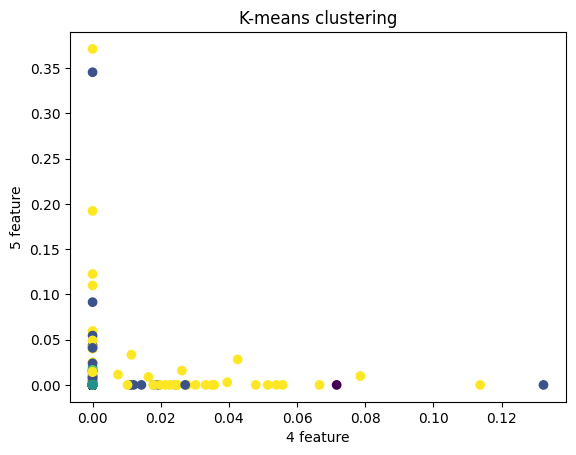

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(normalized_rating[:,4], normalized_rating[:,5], c = k_means_y_norm)
plt.title('K-means clustering')
plt.xlabel('4 feature')
plt.ylabel('5 feature');

**Ответ:** по этой визуализации ничего неясно, и она совершенно не отражает разделение на кластеры, потому что мы берем лишь 2 признака из множества, и двумерный график просто не способен отразить зависимость по 5000 признаков. Если бы мы изначально имели лишь два признака в датасете, то график имел бы смысл, в ином случае - возникают сложности восприятия

Для визуализации данных высокой размерности существует метод t-SNE (стохастическое вложение соседей с t-распределением). Данный метод является нелинейным методом снижения размерности: каждый объект высокой размерности будет моделироваться объектов более низкой (например, 2) размерности таким образом, чтобы похожие объекты моделировались близкими, непохожие - далекими с большой вероятностью.

Примените `TSNE` из библиотеки `sklearn` и визуализируйте полученные объекты, покрасив их в цвета их кластеров

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE()
tsne_music = tsne.fit_transform(normalized_rating)

# https://builtin.com/data-science/tsne-python

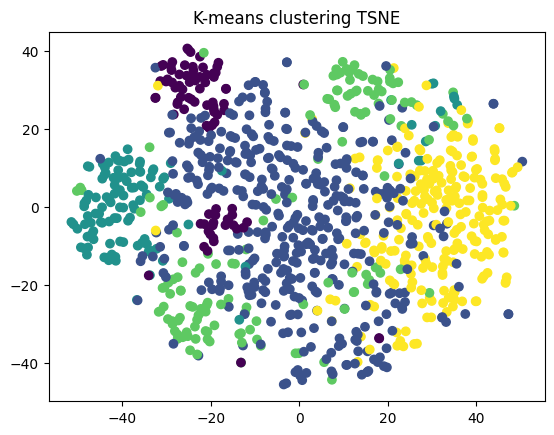

In [ ]:
plt.scatter(tsne_music[:,0], tsne_music[:,1], c = k_means_y_norm)
plt.title('K-means clustering TSNE')
plt.show()

Тут отлично видно, что несмотря на то, что классы сгруппированы по близости, они не то что не отделены друг от друга дистанцией, но и смешиваются, что потверждает наши предыдущие рассуждения. Учитывая неоднозначность задачи, отделить даже таким образом - уже удача!

## Задание 7 (1 балл) Подбор гиперпараметров

Подберите оптимальное количество кластеров (максимум 100 кластеров) с использованием индекса Силуэта. Зафиксируйте `random_state=42`

In [ ]:
from sklearn.metrics import silhouette_score

all_k = [2, 5, 10, 40, 80, 90, 100]
for k in all_k:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(normalized_df)
    clusters = kmeans.predict(normalized_df)
    score = np.round(silhouette_score(X=normalized_df,
                             labels=clusters), 3)
    print(f'{k} - качество кластеризации: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 - качество кластеризации: 0.004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 - качество кластеризации: 0.007


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 - качество кластеризации: 0.008


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


40 - качество кластеризации: 0.008


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


80 - качество кластеризации: 0.011


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


90 - качество кластеризации: 0.013


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


100 - качество кластеризации: 0.015


In [ ]:
# посмотрим в диапазоне от 95 до 100
best_k, best_score = None, -1
for k in range(90, 101):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(normalized_rating)
    clusters = kmeans.predict(normalized_rating)
    score = np.round(silhouette_score(X=normalized_rating,
                             labels=clusters), 4)

    print(f'{k} - Качество кластеризации: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


90 - Качество кластеризации: 0.0127


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


91 - Качество кластеризации: 0.0131


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


92 - Качество кластеризации: 0.0136


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


93 - Качество кластеризации: 0.0137


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


94 - Качество кластеризации: 0.0136


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


95 - Качество кластеризации: 0.0159


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


96 - Качество кластеризации: 0.0132


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


97 - Качество кластеризации: 0.0135


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


98 - Качество кластеризации: 0.0141


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


99 - Качество кластеризации: 0.0145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


100 - Качество кластеризации: 0.0153


Оптимальным оказалось 95 кластеров

Выведите исполнителей, ближайших с центроидам (аналогично заданию 5). Как соотносятся результаты? Остался ли смысл кластеров прежним? Расскажите про смысл 1-2 интересных кластеров, если он изменился и кластеров слишком много, чтобы рассказать про все.

In [ ]:
k_means3 = KMeans(n_clusters = 95, random_state=42)
k_means3.fit(normalized_rating)

clusters_95 = k_means3.predict(normalized_rating)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
top_10_2 = {}

centroids_2 = k_means3.cluster_centers_

for num_centroid, centroid in enumerate(centroids_2):
  cos_sing = {}
  for num_singer, singer in enumerate(normalized_rating):
    cos = cosine(centroid, singer)
    cos_sing[num_singer] = cos
  best = {k: v for k, v in sorted(cos_sing.items(), key=lambda item: item[1], reverse=True)[:10]}
  top_10_2[num_centroid] = [*best.keys()]

artists_10_2 = {}
for cluster, singers in top_10_2.items():
  for singer in singers:
    artists_10_2[cluster] = artists_10_2.get(cluster, []) + [ratings_names.loc[singer]['index']]

In [ ]:
artists_10_2

{0: ['the pussycat dolls',
  'the fall',
  'delerium',
  'glenn\u3000gould',
  'flo rida',
  'jem',
  'janet jackson.',
  'michal w. smith',
  'fergie',
  'neil diamond'],
 1: ['cartel',
  'mae',
  'boys like girls',
  'ne-yo',
  'usher',
  'the game',
  'the red jumpsuit apparatus',
  'nsync',
  'papa roach',
  'boston'],
 2: ['five iron frenzy',
  'sugarcult',
  'the rocket summer',
  'kizz',
  'mayday parade',
  'forever the sickest kids',
  'daughtry',
  'goldfinger',
  'godsmack',
  'hoobastank'],
 3: ['good charlotte',
  'siouxsie and the banshees',
  'danny elfman',
  'lord of the rings',
  'sheryl crow',
  'rascal flatts',
  'trans-siberian orchestra',
  'godsmack',
  'the buzzcocks',
  'mudvayne'],
 4: ['death',
  'fear factory',
  'skinny puppy',
  'kamelot',
  'arch enemy',
  'cannibal corpse',
  'godsmack',
  'sonata arctica1',
  'cooper,  alice',
  'danzig'],
 5: ['natasia beddingfield',
  'chris tomlin',
  'skillet',
  'hawthorne heights',
  'cйline dion',
  'chamillionai

**Ответ:** в 67 кластер попала 'легкая' поп музыка в перемешку с инди ('relient k','kelly clarkson', 'alanis morrisette', 'mae', 'taylor swift', 'lifehouse', 'boys like girls'), что в целом имеет смысл.

63 кластер получился очень забавным, там буквально соседствуют Джастин Тимберлейк и Аэросмит аахаххах. Но на удивление сам по себе кластер довольно гармоничен, потому что, озаглавив его как 'поп-рок', все встанет на свои места - большинство исполнителей действительно поют в этом конкретном стиле ('mariah carey', 'electric light orchestra', 'cobra starship').

В 47 кластер попал и дрейк, и диснеевские песни.. ну это без комментариев (на самом деле это без шуток мой плейлист, поэтому я была бы даже не против, если бы мне яндекс порекомендовал такую подборку. Лучше охватить больше, чем меньше)

Сделайте t-SNE визуализацию полученной кластеризации.

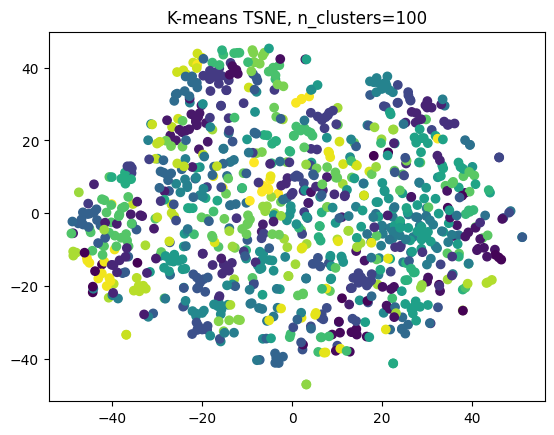

In [ ]:
tsne2 = TSNE()
tsne_95 = tsne2.fit_transform(normalized_rating)

plt.scatter(tsne_95[:,0], tsne_95[:,1], c = clusters_95)
plt.title('K-means TSNE, n_clusters=100')
plt.show()

Тут видно, почему качество по индексу силуэта находится около нуля, а не стремится к единице - кластеры пересекаются

Если кластеров получилось слишком много и визуально цвета плохо отличаются, покрасьте только какой-нибудь интересный кластер из задания выше (`c = (labels == i)`). Хорошо ли этот кластер отражается в визуализации?

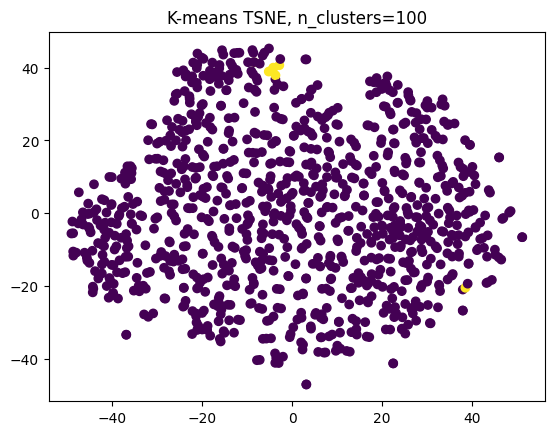

In [ ]:
plt.scatter(tsne_95[:,0], tsne_95[:,1], c = (clusters_95==67))
plt.title('K-means TSNE, n_clusters=100')
plt.show()

**Ответ:** кластер 67 отличвается однородностью музыки, и это отражено в визуализации: большинство объектов находятся очень близко друг другу, фактически накладываясь друг на друга.

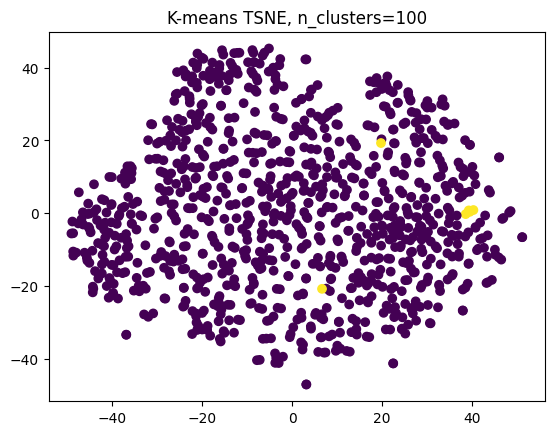

In [ ]:
plt.scatter(tsne_95[:,0], tsne_95[:,1], c = (clusters_95==63))
plt.title('K-means TSNE, n_clusters=100')
plt.show()

А вот разнородные объекты кластера 63 (поп-рок) разбросаны по всему графику

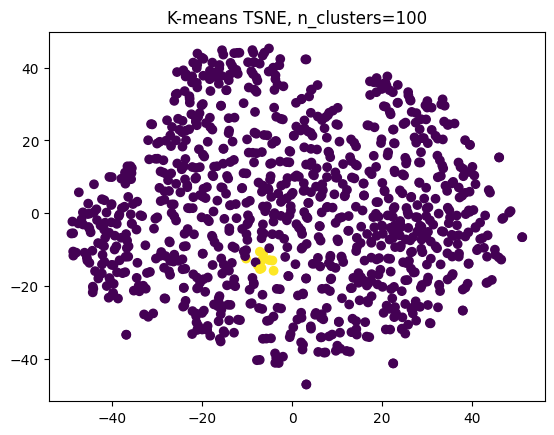

In [ ]:
plt.scatter(tsne_95[:,0], tsne_95[:,1], c = (clusters_95==47))
plt.title('K-means TSNE, n_clusters=100')
plt.show()

На удивление кластер 47 оказался самым концентированных! У него даже нет единичных объектов, находящихся на большом расстоянии от остальных